In [1]:
import torch
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
from torchzero.optim.first_order.gd import GD
from image_descent import ImageDescent, FunctionDescent2D, surfaces
from glio.plot import *

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

In [2]:
y = torch.nn.Parameter(torch.tensor(3.))

opt = QuadraticGDC([y], 0.1)
def closure(backward:bool):
    loss = (y**2) + 10
    if backward: loss.backward()
    return loss
opt.step(closure) # type:ignore # pylint:disable=W0106
print(y)

Parameter containing:
tensor(0.0265, requires_grad=True)


tensor(0.7761)
tensor(0.0003)
tensor(5.8695e-06)
[25.673816026358445, 22.718394690494506, 31.078980914066232]


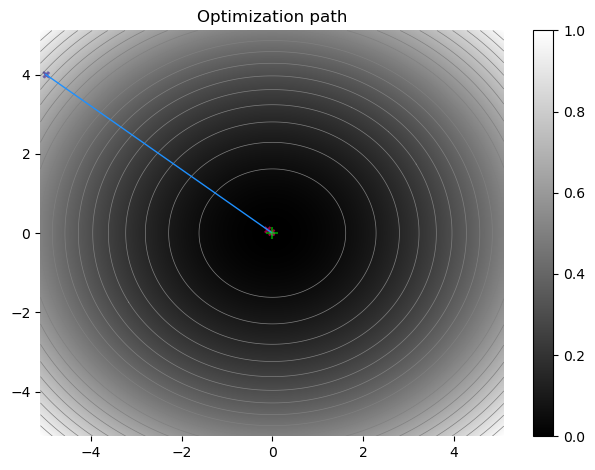

In [3]:
descent = FunctionDescent2D(surfaces.sphere)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1, max_dist=50, discard_over=50, log_minimum_x=True)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
print(optimizer.log)
descent.plot_path()

tensor(0.6639)
tensor(6.0922e-05)
tensor(5.2733e-09)


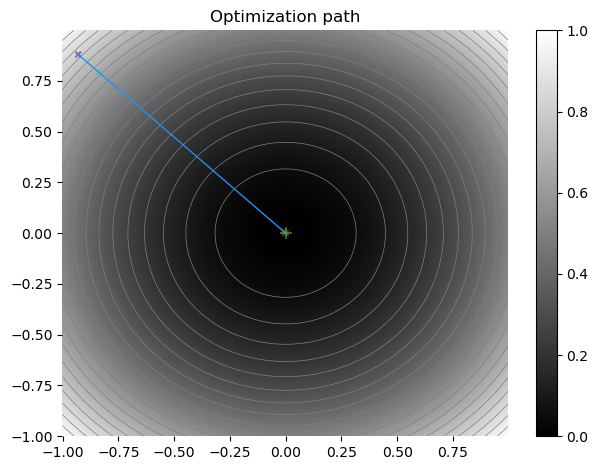

In [4]:
descent = FunctionDescent2D(surfaces.convex)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.6321)
tensor(0.1516)
tensor(0.0348)
tensor(0.0064)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)


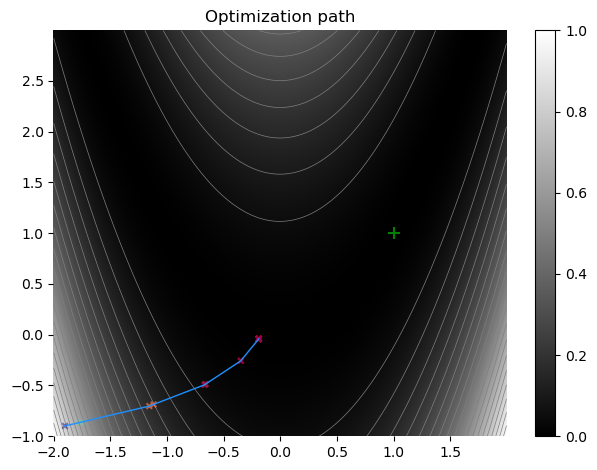

In [5]:
descent = FunctionDescent2D(surfaces.rosenbrock)
optimizer = QuadraticGDC(descent.parameters(), lr = 0.1)
for i in range(10):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.8155)
tensor(0.7443)
tensor(0.7023)
tensor(0.5916)
tensor(0.4891)
tensor(0.5584)
tensor(0.5595)
tensor(0.3949)
tensor(0.3363)
tensor(0.2636)
tensor(0.2033)
tensor(0.1771)
tensor(0.1614)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1605)
tensor(0.1

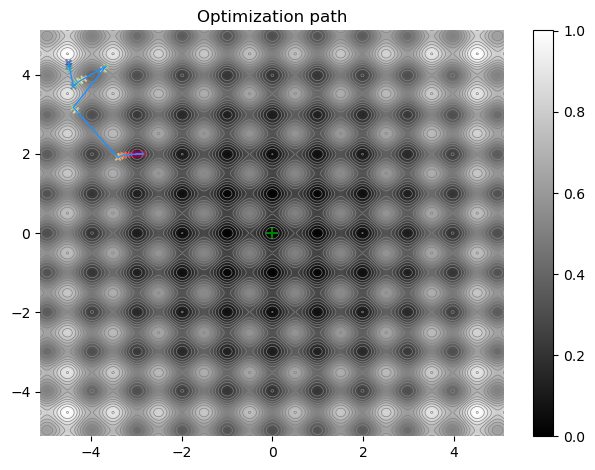

In [6]:
descent = FunctionDescent2D(surfaces.rastrigin)
optimizer = QuadraticGDC(descent.parameters(), lr = 1e-1)
for i in range(100):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.3645)
tensor(0.1093)
tensor(0.0326)
tensor(0.0107)
tensor(0.0026)
tensor(0.0019)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0010)
tensor(0.0008)
tensor(0.0008)
tensor(0.0008)


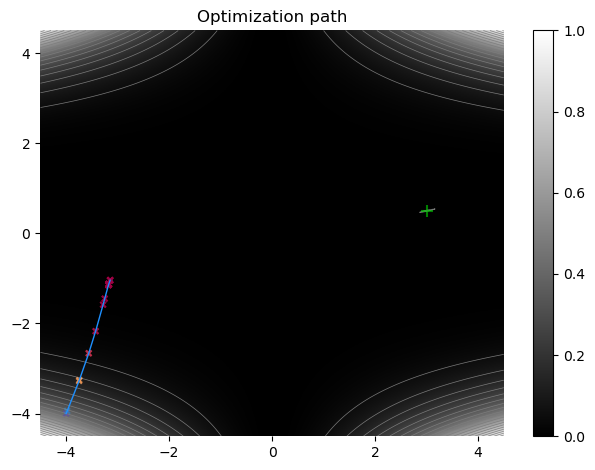

In [7]:
descent = FunctionDescent2D(surfaces.beale)
optimizer = QuadraticGDC(descent.parameters(), lr = 1e-1, max_dist=10000, discard_over=10000)
for i in range(20):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()

tensor(0.2353)
tensor(0.0150)
tensor(0.0001)


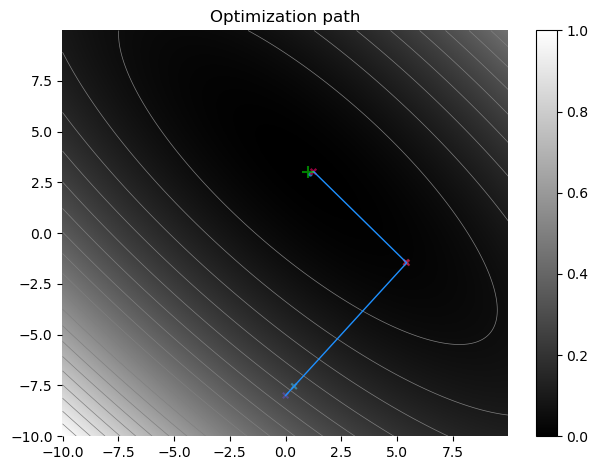

In [8]:
descent = FunctionDescent2D(surfaces.booth)
optimizer = QuadraticGDC(descent.parameters(), lr = 10, max_dist=10000, discard_over=10000)
for i in range(3):
    def closure(backward:bool):
        loss = descent.step()
        if backward: 
            optimizer.zero_grad()
            loss.backward()
        return loss
    loss = optimizer.step(closure)
    print(loss)
descent.plot_path()